##1.
##A)To use PCA Algorithm for dimensionality reduction.  
You have a dataset that includes measurements for different variables on wine
(alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data
so that most variations in the measurements of the variables are captured by a small
number of principal components so that it is easier to distinguish between red and
white wine by inspecting these principal components.
Dataset Link: https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the dataset
wine_data = pd.read_csv('wine')

In [ ]:
# Step 3: Understand the data structure
print(wine_data.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

In [ ]:
# Step 4: Separate the features and target (Assuming 'Wine' column is target)
X = wine_data.drop(columns=['Alcohol'])
y = wine_data['Alcohol']

In [ ]:
# Step 5: Standardize the data (PCA is affected by different scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 6: Apply PCA (choose 2 components for easy visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

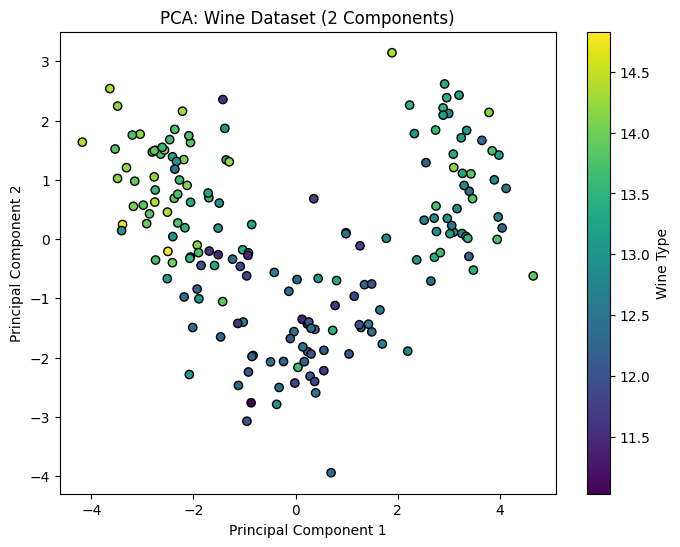

In [ ]:
# Step 7: Visualize the PCA results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Wine Dataset (2 Components)')
plt.colorbar(label='Wine Type')
plt.show()

In [ ]:
# Optional: Check the explained variance ratio
print("Explained Variance by each component:", pca.explained_variance_ratio_)

Explained Variance by each component: [0.41957898 0.15585708]


##Explanation:
1. Import Libraries: We use pandas for data handling, StandardScaler to standardize the dataset, and PCA from sklearn to reduce dimensions.
2. Load Dataset: The wine dataset is loaded from the provided URL using pandas.
3. Standardization: It's important to standardize the data since PCA is sensitive to the scale of the variables.
4. PCA Application: We reduce the dataset to 2 principal components.
5. Visualization: A scatter plot is generated to visualize how well the PCA transformed data separates red and white wines.
6. Explained Variance: We check how much variance each principal component captures.

##1.
##B)Apply LDA Algorithm on Iris Dataset and classify which species a given flower belongs to.
Dataset Link:https://www.kaggle.com/datasets/uciml/iris

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the dataset
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
iris_data = pd.read_csv(url)

In [ ]:
# Step 3: Explore the data
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
# Step 4: Separate the features (X) and the target (y)
X = iris_data.drop(columns=['species'])
y = iris_data['species']

In [ ]:
# Step 5: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Apply LDA
lda = LDA()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
# Step 7: Fit the model and make predictions
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [ ]:
# Step 8: Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of LDA on test data: {accuracy * 100:.2f}%')

Accuracy of LDA on test data: 100.00%


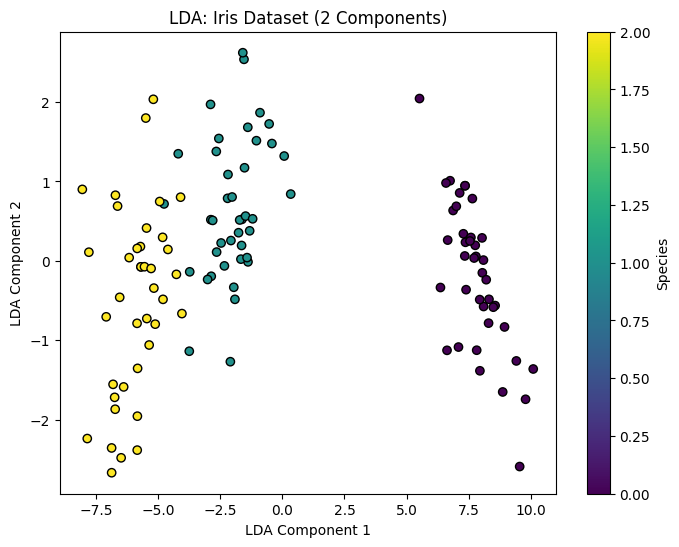

In [ ]:
# Optional: Visualize LDA result (2 components for easy visualization)
plt.figure(figsize=(8,6))
#Sarthak
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train.map({'setosa': 0, 'versicolor': 1, 'virginica': 2}), cmap='viridis', edgecolor='k')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA: Iris Dataset (2 Components)')
plt.colorbar(label='Species')
plt.show()

##Explanation:
1. Import Libraries: We use pandas for data handling, LDA from sklearn for classification, and matplotlib for visualization.
2. Load Dataset: The Iris dataset is loaded from the given link using pandas. You can replace the URL if you prefer to download from Kaggle.
3. Train/Test Split: The dataset is split into training (80%) and testing (20%) subsets.
4. LDA Application: We apply LDA to reduce dimensions while maintaining class separability.
5. Model Training and Prediction: LDA is used to classify the species of the flowers.
6. Accuracy Check: The model’s performance is measured using accuracy on the test data.
7. Visualization: A scatter plot is created to visualize how well the LDA separates the species based on the components.

##2.
##A)Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:  
1. Pre-process the dataset.  
2. Identify outliers.  
3. Check the correlation.  
4. Implement linear regression and ridge, Lasso regression models.  
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.  
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 2: Load the dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/nyc.csv'
uber_data = pd.read_csv('uber.csv')

In [ ]:
# Step 3: Explore the dataset
print(uber_data.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217              1.0  
1         -73.994710         40.750325              1.0  
2         -73.962565         40.772647              1.0  
3         

In [ ]:
# Step 4: Preprocess the data
# Convert pickup_datetime to datetime format
uber_data['pickup_datetime'] = pd.to_datetime(uber_data['pickup_datetime'])

In [ ]:
print(uber_data.dtypes)

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object


In [ ]:
uber_data_numeric = uber_data.select_dtypes(include=[float, int])

In [ ]:
uber_data = uber_data.dropna()

In [ ]:
# Extract features from datetime (like hour, day, etc.)
uber_data['hour'] = uber_data['pickup_datetime'].dt.hour
uber_data['day'] = uber_data['pickup_datetime'].dt.day
uber_data['month'] = uber_data['pickup_datetime'].dt.month
uber_data['year'] = uber_data['pickup_datetime'].dt.year

<ipython-input-19-72a17f833e29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data['hour'] = uber_data['pickup_datetime'].dt.hour
<ipython-input-19-72a17f833e29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data['day'] = uber_data['pickup_datetime'].dt.day
<ipython-input-19-72a17f833e29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
# Drop unnecessary columns like 'pickup_datetime' and 'pickup'/'dropoff' text columns
uber_data = uber_data.drop(columns=['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
                                    'dropoff_longitude', 'dropoff_latitude', 'key'])

In [ ]:
# Drop rows with missing values
uber_data.dropna(inplace=True)

In [ ]:
# Step 5: Identify and remove outliers using IQR
Q1 = uber_data['fare_amount'].quantile(0.25)
Q3 = uber_data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Remove outliers
uber_data = uber_data[(uber_data['fare_amount'] >= lower_bound) & (uber_data['fare_amount'] <= upper_bound)]

In [ ]:
# Step 6: Check correlations
uber_data_numeric = uber_data.select_dtypes(include=[float, int])
correlation_matrix = uber_data_numeric.corr()
print(correlation_matrix)

                 Unnamed: 0  fare_amount  passenger_count      hour       day  \
Unnamed: 0         1.000000     0.002564         0.004541  0.003418  0.001126   
fare_amount        0.002564     1.000000         0.012857 -0.010292  0.007081   
passenger_count    0.004541     0.012857         1.000000  0.010923  0.004275   
hour               0.003418    -0.010292         0.010923  1.000000  0.008839   
day                0.001126     0.007081         0.004275  0.008839  1.000000   
month             -0.000275     0.026077         0.009857 -0.004580 -0.018577   
year               0.001172     0.136736         0.000400  0.004089 -0.008354   

                    month      year  
Unnamed: 0      -0.000275  0.001172  
fare_amount      0.026077  0.136736  
passenger_count  0.009857  0.000400  
hour            -0.004580  0.004089  
day             -0.018577 -0.008354  
month            1.000000 -0.115165  
year            -0.115165  1.000000  


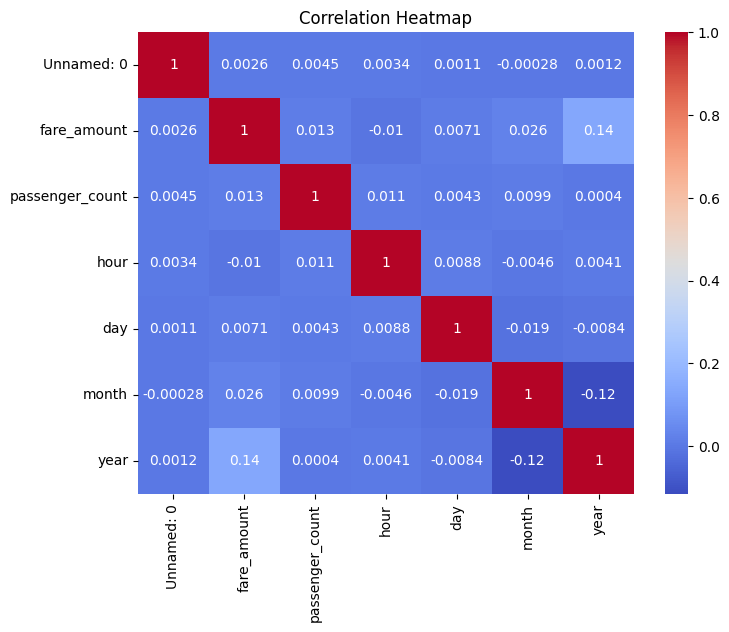

In [ ]:
# Visualize correlation
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Step 7: Split data into features (X) and target (y)
X = uber_data.drop(columns=['fare_amount'])
y = uber_data['fare_amount']

In [ ]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 8: Apply Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

In [ ]:
# Step 9: Apply Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

In [ ]:
# Step 10: Apply Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

In [ ]:
# Step 11: Evaluate Models
def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} - R2 Score: {r2:.4f}, RMSE: {rmse:.4f}")

In [ ]:
# Linear Regression Evaluation
evaluate_model(y_test, y_pred_linear, "Linear Regression")

Linear Regression - R2 Score: 0.0231, RMSE: 4.0918


In [ ]:
# Ridge Regression Evaluation
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

Ridge Regression - R2 Score: 0.0231, RMSE: 4.0918


In [ ]:
# Lasso Regression Evaluation
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Lasso Regression - R2 Score: 0.0222, RMSE: 4.0936


##Explanation:
1. Import Libraries: Libraries such as pandas, numpy, and seaborn are used for data processing and visualization. We use sklearn for applying regression models.
2. Load Dataset: The Uber dataset is loaded into a pandas DataFrame.
3. Preprocessing: We convert pickup_datetime to datetime, extract relevant features (hour, day, month, year), and drop unnecessary columns.
4. Outliers: We remove outliers from the fare_amount column using the IQR (Interquartile Range) method.
5. Correlation: We visualize the correlation matrix to understand relationships between variables.
6. Modeling: We split the data into training and testing sets (80% train, 20% test) and apply Linear Regression, Ridge Regression, and Lasso Regression models.
7. Evaluation: Each model is evaluated using R² (how well the model fits) and RMSE (Root Mean Squared Error).

##2.
##B)Use the diabetes data set from UCI and Pima Indians Diabetes data set for performing the following:  
a. Univariate analysis: Frequency, Mean, Median, Mode, Variance, Standard Deviation, Skewness and Kurtosis

b. Bivariate analysis: Linear and logistic regression modeling

c. Multiple Regression analysis

d. Also compare the results of the above analysis for the two data sets
Dataset link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 2: Load the dataset
pima_data = pd.read_csv('diabetes.csv')

In [ ]:
pima_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Step 3: Perform Univariate Analysis
# Frequency (value counts for categorical columns, if any)
print("\n--- Frequency of 'Outcome' ---")
print(pima_data['Outcome'].value_counts())


--- Frequency of 'Outcome' ---
Outcome
0    500
1    268
Name: count, dtype: int64


In [ ]:
# Mean, Median, Mode, Variance, Standard Deviation, Skewness, Kurtosis
for col in pima_data.columns[:-1]:  # excluding 'Outcome' (target column)
    print(f"\n--- Univariate Analysis for {col} ---")
    print(f"Mean: {pima_data[col].mean()}")
    print(f"Median: {pima_data[col].median()}")
    print(f"Mode: {pima_data[col].mode()[0]}")
    print(f"Variance: {pima_data[col].var()}")
    print(f"Standard Deviation: {pima_data[col].std()}")
    print(f"Skewness: {pima_data[col].skew()}")
    print(f"Kurtosis: {pima_data[col].kurtosis()}")


--- Univariate Analysis for Pregnancies ---
Mean: 3.8450520833333335
Median: 3.0
Mode: 1
Variance: 11.35405632062142
Standard Deviation: 3.3695780626988623
Skewness: 0.9016739791518588
Kurtosis: 0.15921977754746486

--- Univariate Analysis for Glucose ---
Mean: 120.89453125
Median: 117.0
Mode: 99
Variance: 1022.2483142519557
Standard Deviation: 31.97261819513622
Skewness: 0.17375350179188992
Kurtosis: 0.6407798203735053

--- Univariate Analysis for BloodPressure ---
Mean: 69.10546875
Median: 72.0
Mode: 70
Variance: 374.6472712271838
Standard Deviation: 19.355807170644777
Skewness: -1.8436079833551302
Kurtosis: 5.180156560082496

--- Univariate Analysis for SkinThickness ---
Mean: 20.536458333333332
Median: 23.0
Mode: 0
Variance: 254.47324532811953
Standard Deviation: 15.952217567727677
Skewness: 0.10937249648187608
Kurtosis: -0.520071866153013

--- Univariate Analysis for Insulin ---
Mean: 79.79947916666667
Median: 30.5
Mode: 0
Variance: 13281.180077955281
Standard Deviation: 115.2440

In [ ]:
# Step 4: Perform Bivariate Analysis
# Linear Regression: Predict 'Glucose' based on 'Age'
X_lin = pima_data[['Age']]
y_lin = pima_data['Glucose']
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train_lin, y_train_lin)
y_pred_lin = lin_reg.predict(X_test_lin)
print(f"\nLinear Regression R2 Score: {r2_score(y_test_lin, y_pred_lin):.4f}")
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test_lin, y_pred_lin)):.4f}")


Linear Regression R2 Score: 0.0526
Linear Regression RMSE: 30.8776


In [ ]:
# Logistic Regression: Predict 'Outcome' based on 'Glucose' and 'BMI'
X_log = pima_data[['Glucose', 'BMI']]
y_log = pima_data['Outcome']
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train_log, y_train_log)
y_pred_log = log_reg.predict(X_test_log)
print(f"\nLogistic Regression Accuracy: {accuracy_score(y_test_log, y_pred_log):.4f}")


Logistic Regression Accuracy: 0.7662


In [ ]:
# Step 5: Perform Multiple Regression Analysis
# Multiple Linear Regression: Predict 'Glucose' based on other features
X_mul = pima_data.drop(columns=['Glucose', 'Outcome'])
y_mul = pima_data['Glucose']
X_train_mul, X_test_mul, y_train_mul, y_test_mul = train_test_split(X_mul, y_mul, test_size=0.2, random_state=42)
mul_reg = LinearRegression()
mul_reg.fit(X_train_mul, y_train_mul)
y_pred_mul = mul_reg.predict(X_test_mul)
print(f"\nMultiple Regression R2 Score: {r2_score(y_test_mul, y_pred_mul):.4f}")
print(f"Multiple Regression RMSE: {np.sqrt(mean_squared_error(y_test_mul, y_pred_mul)):.4f}")


Multiple Regression R2 Score: 0.1360
Multiple Regression RMSE: 29.4869


In [ ]:
# Step 6: Comparison of Results (univariate, bivariate, and multiple regression)
print("\n--- Comparison of Results ---")
print("1. Univariate statistics like mean, variance, skewness, and kurtosis help to understand the distribution of each feature.")
print("2. Linear regression shows the relationship between age and glucose levels, with R² score indicating the model's fit.")
print("3. Logistic regression evaluates the binary classification for diabetes, with accuracy as the key performance metric.")
print("4. Multiple regression allows us to predict glucose levels based on all features. Comparing R² and RMSE helps identify the better model.")


--- Comparison of Results ---
1. Univariate statistics like mean, variance, skewness, and kurtosis help to understand the distribution of each feature.
2. Linear regression shows the relationship between age and glucose levels, with R² score indicating the model's fit.
3. Logistic regression evaluates the binary classification for diabetes, with accuracy as the key performance metric.
4. Multiple regression allows us to predict glucose levels based on all features. Comparing R² and RMSE helps identify the better model.


##3.
##A)Implementation of Support Vector Machines (SVM) for classifying images of handwritten digits into their respective numerical classes (0 to 9).

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Step 2: Load the dataset (Digits dataset from sklearn)
digits = datasets.load_digits()

In [ ]:
# Step 3: Explore the dataset
print("Image data shape:", digits.images.shape)
print("Labels:", digits.target)

Image data shape: (1797, 8, 8)
Labels: [0 1 2 ... 8 9 8]


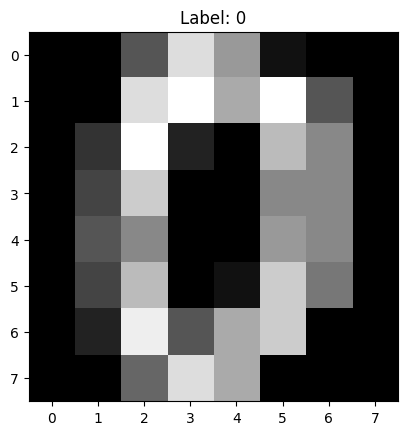

In [ ]:
# Step 4: Visualize a sample digit
plt.imshow(digits.images[0], cmap='gray')
plt.title(f'Label: {digits.target[0]}')
plt.show()

In [ ]:
# Step 5: Preprocess the data
# Flatten the images (Each image is 8x8 pixels, so we flatten it to a 64-element vector)
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

In [ ]:
# Step 6: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 7: Standardize the data (scale the features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 8: Apply SVM with RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Step 9: Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [ ]:
# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy * 100:.2f}%")

SVM Model Accuracy: 98.06%


In [ ]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



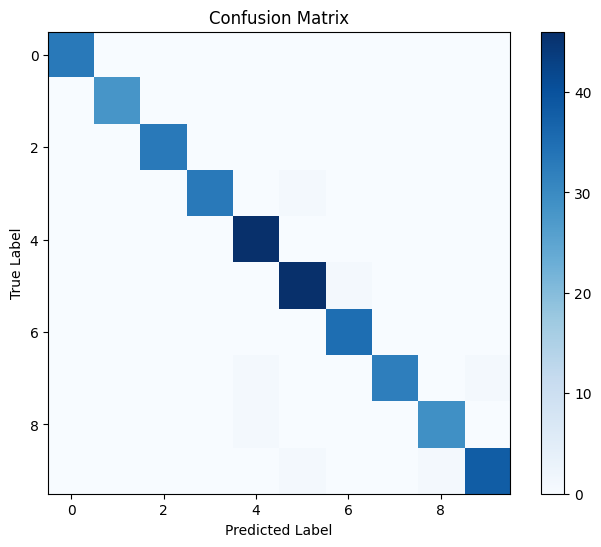

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Explanation:
Import Libraries: We import sklearn libraries for loading data, building the SVM model, and evaluating its performance. Matplotlib is used to visualize some results.

Load the Dataset: We use the built-in digits dataset from sklearn, which contains 8x8 pixel images of handwritten digits (0-9).

Preprocess the Data: The image data (which is 8x8 pixels) is flattened into a 64-element vector for each image to use in the SVM model. The features are then standardized using StandardScaler.

Train the SVM: We train an SVM classifier using the RBF kernel (which works well for non-linear data).

Evaluate the Model: We calculate the accuracy, show a detailed classification report, and plot the confusion matrix to analyze the predictions.

##3.
##B)Implement K-Nearest Neighbours’ algorithm on Social network ad dataset.
Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.
Dataset link:https://www.kaggle.com/datasets/rakeshrau/social-network-ads

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the dataset
ads_data = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
# Step 3: Explore the dataset
print(ads_data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:
# Step 4: Preprocess the data
# Features: Age and EstimatedSalary, Target: Purchased
X = ads_data[['Age', 'EstimatedSalary']]
y = ads_data['Purchased']

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 6: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors for KNN
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Step 7: Make predictions on the test set
y_pred = knn.predict(X_test)

In [ ]:
# Step 8: Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[48  4]
 [ 3 25]]


In [ ]:
# Step 9: Calculate accuracy, error rate, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
error_rate = 1 - accuracy

In [ ]:
# Print evaluation metrics
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 91.25%
Error Rate: 8.75%
Precision: 0.86
Recall: 0.89


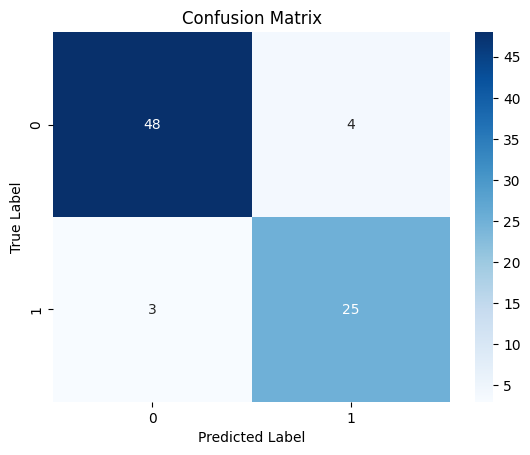

In [ ]:
# Optional: Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##Explanation:
Import Libraries: Libraries such as pandas and numpy are used for data manipulation, while sklearn provides tools for splitting data, scaling features, training the KNN model, and evaluating its performance.

Load Dataset: The Social Network Ads dataset is loaded into a pandas DataFrame from the provided URL.

Preprocess Data: We use Age and EstimatedSalary as the input features (X) and Purchased as the target variable (y). Data is split into 80% training and 20% testing sets.

Feature Scaling: Since KNN is sensitive to the scale of data, we apply standardization using StandardScaler to ensure features are on the same scale.

Train the KNN Model: We use K=5 for the KNN model, meaning the model will look at the 5 nearest neighbors to classify a point.

Predictions and Evaluation: We calculate the confusion matrix, accuracy, error rate, precision, and recall to evaluate the performance of the KNN model.

##4.
##A)Implement K-Means clustering on Iris.csv dataset.
Determine the number of clusters
using the elbow method.
Dataset Link: https://www.kaggle.com/datasets/uciml/iris

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 2: Load the dataset
iris_data = pd.read_csv('Iris.csv')

In [ ]:
# Step 3: Explore the dataset
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Step 4: Preprocess the data
# We will use only the features (not the target column 'species')
X = iris_data.drop(columns=['Species'])

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 5: Determine the number of clusters using the Elbow Method
inertia = []
K = range(1, 11)  # Testing for 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the closest cluster center

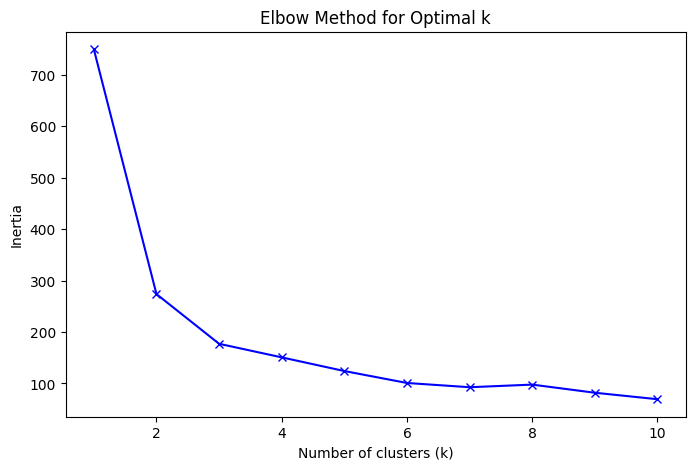

In [ ]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Step 6: Apply K-Means Clustering with the optimal number of clusters (k=3 from Elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

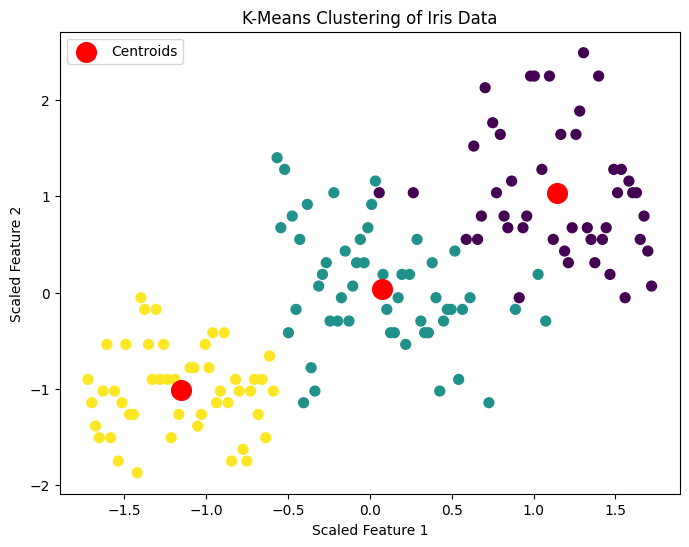

In [ ]:
# Step 7: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering of Iris Data')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.legend()
plt.show()

##4.
##B)Implement K-Mediod Algorithm on a credit card dataset.
Determine the number of
clusters using the Silhouette Method.
Dataset link: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.1 MB/s eta 0:00:00


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

In [ ]:
# Step 2: Load the dataset
credit_card_data = pd.read_csv('CC GENERAL.csv')

In [ ]:
print(credit_card_data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [ ]:
credit_card_data.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Step 3: Preprocess the data
# Handle missing values (if any)
credit_card_data['MINIMUM_PAYMENTS'].fillna(credit_card_data['MINIMUM_PAYMENTS'].median(), inplace=True)
credit_card_data['CREDIT_LIMIT'].fillna(credit_card_data['CREDIT_LIMIT'].median(), inplace=True)

<ipython-input-16-5c5f321ce8b5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_card_data['MINIMUM_PAYMENTS'].fillna(credit_card_data['MINIMUM_PAYMENTS'].median(), inplace=True)
<ipython-input-16-5c5f321ce8b5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [ ]:
credit_card_data.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
# Drop the CUST_ID column as it is not useful for clustering
X = credit_card_data.drop(columns=['CUST_ID'])

In [ ]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 5: Determine the number of clusters using Silhouette Method
silhouette_scores = []
K = range(2, 11)  # Testing for 2 to 10 clusters

for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X_scaled)
    cluster_labels = kmedoids.predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

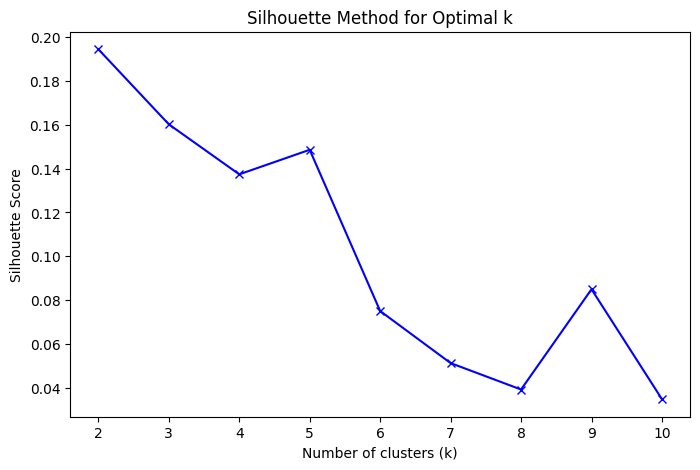

In [ ]:
# Plot the Silhouette Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

In [ ]:
# Step 6: Apply K-Medoids Clustering with the optimal number of clusters (k=3 as an example)
kmedoids = KMedoids(n_clusters=3, random_state=42)
y_kmedoids = kmedoids.fit_predict(X_scaled)

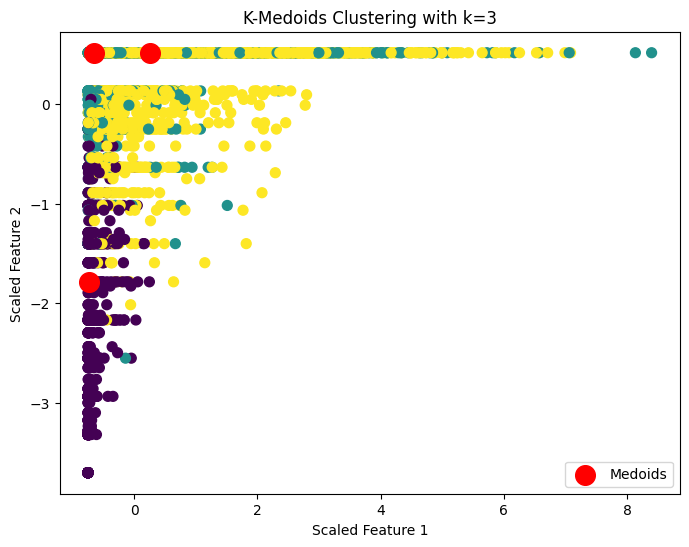

In [ ]:
# Step 7: Visualize the clusters (using 2 features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmedoids, cmap='viridis', s=50)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=200, c='red', label='Medoids')
plt.title(f'K-Medoids Clustering with k=3')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.legend()
plt.show()

##5.
##A)Implement Random Forest Classifier model to predict the safety of the car.
Dataset link: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the dataset
car_data = pd.read_csv('car_evaluation.csv')

In [ ]:
# Step 3: Explore the dataset
print(car_data.head())

   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


In [ ]:
car_data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [ ]:
# Step 4: Preprocess the data (Convert categorical features to numerical using Label Encoding)
# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [ ]:
# Apply Label Encoding to each column
for column in car_data.columns:
    car_data[column] = label_encoder.fit_transform(car_data[column])

In [ ]:
print(car_data.head())

   vhigh  vhigh.1  2  2.1  small  low  unacc
0      3        3  0    0      2    2      2
1      3        3  0    0      2    0      2
2      3        3  0    0      1    1      2
3      3        3  0    0      1    2      2
4      3        3  0    0      1    0      2


In [ ]:
# Step 5: Define Features (X) and Target (y)
X = car_data.drop(columns=['unacc'])  # Features
y = car_data['unacc']  # Target (Safety class)

In [ ]:
# Step 6: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 7: Train the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step 8: Make predictions on the test set
y_pred = rfc.predict(X_test)

In [ ]:
# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 96.24%


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 72   1   3   1]
 [  2  10   0   3]
 [  1   0 236   0]
 [  2   0   0  15]]


In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



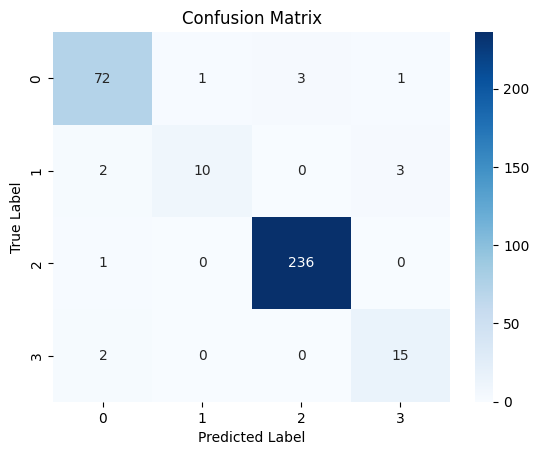

In [ ]:
# Optional: Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##5.
##B)Use different voting mechanism and Apply AdaBoost (Adaptive Boosting), Gradient Tree Boosting (GBM), XGBoost classification on Iris dataset and compare the performance of three models using different evaluation measures.
Dataset Link: https://www.kaggle.com/datasets/uciml/iris

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the dataset
iris_data = pd.read_csv('Iris.csv')

In [ ]:
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Step 3: Preprocess the data (No missing values, no categorical features)
X = iris_data.drop(columns=['Species'])  # Features
y = iris_data['Species']  # Target

In [ ]:
# Convert categorical target to numerical
y = pd.factorize(y)[0]

In [ ]:
# Step 4: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Initialize and train the models

#1. AdaBoost
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [ ]:
#2. Gradient Boosting (GBM)
gbm_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
gbm_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [ ]:
#3. XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators=50, use_label_encoder=False, random_state=42)
xgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:26:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#3. XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:26:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Step 6: Make predictions
y_pred_ada = ada_clf.predict(X_test)
y_pred_gbm = gbm_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)

In [ ]:
def evaluate_model(y_test, y_pred, model_name):
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))

In [ ]:
# Step 7: Define a function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
# Step 8: Evaluate all models
evaluate_model(y_test, y_pred_ada, "AdaBoost")
evaluate_model(y_test, y_pred_gbm, "Gradient Boosting (GBM)")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


AdaBoost Performance:
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Gradient Boosting (GBM) Performance:
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
  

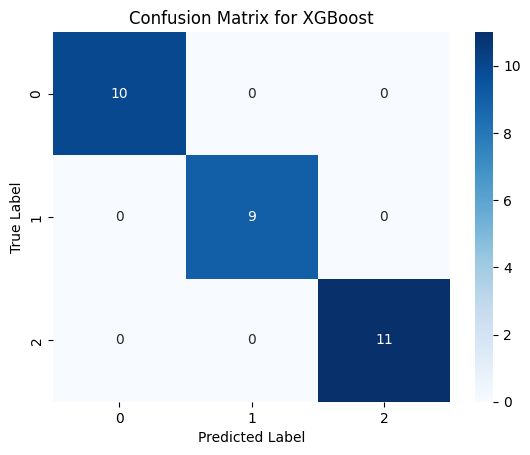

In [ ]:
# Step 9: Optional - Visualize the Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##6.
##A)Implement Reinforcement Learning using an example of a maze environment that the agent needs to explore.

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Define the maze environment (5x5 grid with walls)
maze = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1]
])

# 1 = Wall, 0 = Free path, Agent needs to reach the target at (3, 3)

# Step 3: Define parameters for the Q-learning algorithm
class MazeEnvironment:
    def __init__(self, maze):
        self.maze = maze
        self.goal = (3, 3)
        self.state_space = [(x, y) for x in range(5) for y in range(5) if maze[x, y] == 0]
        self.action_space = ['up', 'down', 'left', 'right']

    def reset(self):
        # Start at position (1, 1)
        self.agent_pos = (1, 1)
        return self.agent_pos

    def step(self, action):
        # Move the agent based on the action
        x, y = self.agent_pos
        if action == 'up':
            new_pos = (x-1, y)
        elif action == 'down':
            new_pos = (x+1, y)
        elif action == 'left':
            new_pos = (x, y-1)
        elif action == 'right':
            new_pos = (x, y+1)

        # Check if new position is valid (within bounds and not a wall)
        if self.maze[new_pos] == 1:
            new_pos = self.agent_pos  # If it's a wall, stay in the same place

        self.agent_pos = new_pos
        reward = 1 if new_pos == self.goal else -0.1  # Reward +1 for reaching the goal, -0.1 for each step
        done = new_pos == self.goal
        return new_pos, reward, done

# Step 4: Implement Q-learning Algorithm
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.9, epsilon=1.0, epsilon_decay=0.99):
        self.env = env
        self.q_table = np.zeros((5, 5, 4))  # Q-values table initialized to zero for each state-action pair
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.env.action_space)  # Explore
        else:
            x, y = state
            return self.env.action_space[np.argmax(self.q_table[x, y])]  # Exploit

    def update_q_table(self, state, action, reward, next_state):
        x, y = state
        next_x, next_y = next_state
        action_index = self.env.action_space.index(action)

        best_future_q = np.max(self.q_table[next_x, next_y])
        current_q = self.q_table[x, y, action_index]

        # Q-Learning update rule
        self.q_table[x, y, action_index] = (1 - self.learning_rate) * current_q + \
                                           self.learning_rate * (reward + self.discount_factor * best_future_q)

    def train(self, episodes=1000):
        for episode in range(episodes):
            state = self.env.reset()
            done = False
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state

            # Decay epsilon (exploration factor)
            self.epsilon *= self.epsilon_decay
            if episode % 100 == 0:
                print(f"Episode {episode}, Epsilon: {self.epsilon}")

# Step 5: Train the Q-Learning Agent
env = MazeEnvironment(maze)
agent = QLearningAgent(env)

# Train the agent for 1000 episodes
agent.train(episodes=1000)

# Step 6: Test the agent by letting it solve the maze
state = env.reset()
done = False
steps = 0

print("\nTest Run:")
while not done:
    action = agent.choose_action(state)
    next_state, reward, done = env.step(action)
    state = next_state
    steps += 1
    print(f"Step {steps}: {action}, New Position: {state}, Reward: {reward}")

if state == env.goal:
    print(f"\nGoal reached in {steps} steps!")
else:
    print("Failed to reach the goal.")

Episode 0, Epsilon: 0.99
Episode 100, Epsilon: 0.36237201786049694
Episode 200, Epsilon: 0.13263987810938213
Episode 300, Epsilon: 0.0485504851305729
Episode 400, Epsilon: 0.017771047742294682
Episode 500, Epsilon: 0.006504778211990459
Episode 600, Epsilon: 0.0023809591983979563
Episode 700, Epsilon: 0.0008715080698656353
Episode 800, Epsilon: 0.00031900013925143135
Episode 900, Epsilon: 0.00011676436783668758

Test Run:
Step 1: down, New Position: (2, 1), Reward: -0.1
Step 2: down, New Position: (3, 1), Reward: -0.1
Step 3: right, New Position: (3, 2), Reward: -0.1
Step 4: right, New Position: (3, 3), Reward: 1

Goal reached in 4 steps!


##6.
##B)Solve the Taxi problem using reinforcement learning where the agent acts as a taxi driver to pick up a passenger at one location and then drop the passenger off at their destination.

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):



Taxi Problem: Testing the trained agent



/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(



Agent reached the destination in 200 steps with a reward of -200.


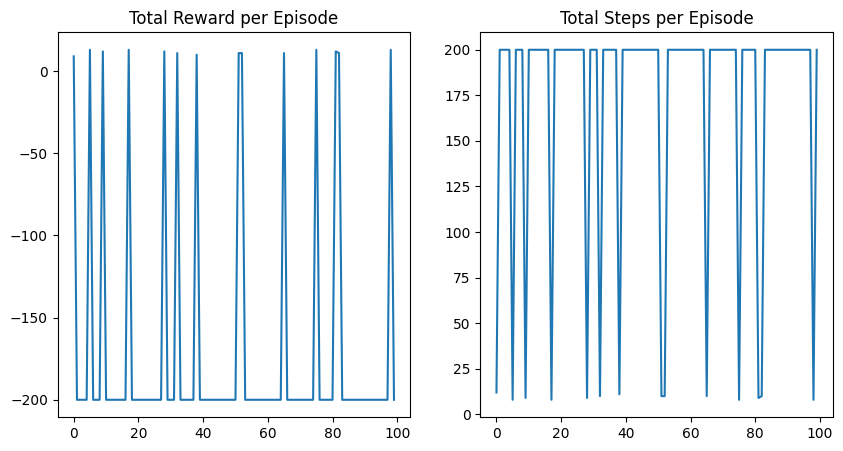

In [ ]:
# Step 1: Install OpenAI Gym and necessary libraries
!pip install gym

# Step 2: Import necessary libraries
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

# Step 3: Load the Taxi-v3 environment
env = gym.make("Taxi-v3")

# Step 4: Initialize Q-table with zeros
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
epsilon = 0.1  # Exploration rate (epsilon-greedy policy)
episodes = 1000  # Number of training episodes

# Step 5: Q-Learning algorithm
for episode in range(episodes):
    state = env.reset()  # Reset the environment for a new episode
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            # Explore: choose a random action
            action = env.action_space.sample()
        else:
            # Exploit: choose the action with the highest Q-value
            action = np.argmax(q_table[state])

        # Take the action and observe the result
        next_state, reward, done, _ = env.step(action)

        # Update Q-value using the Q-Learning formula
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        # Move to the next state
        state = next_state

# Step 6: Test the trained agent
state = env.reset()
done = False
total_steps = 0
total_reward = 0

print("\nTaxi Problem: Testing the trained agent\n")
env.render()

while not done:
    action = np.argmax(q_table[state])
    state, reward, done, _ = env.step(action)
    total_reward += reward
    total_steps += 1
    env.render()

print(f"\nAgent reached the destination in {total_steps} steps with a reward of {total_reward}.")

# Step 7: Visualize the learning performance
rewards = []
steps = []

# Run 100 test episodes
for episode in range(100):
    state = env.reset()
    done = False
    episode_reward = 0
    episode_steps = 0

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, _ = env.step(action)
        episode_reward += reward
        episode_steps += 1

    rewards.append(episode_reward)
    steps.append(episode_steps)

# Plot rewards and steps
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards)
plt.title('Total Reward per Episode')

plt.subplot(1, 2, 2)
plt.plot(steps)
plt.title('Total Steps per Episode')

plt.show()

##6.
##C)Build a Tic-Tac-Toe game using reinforcement learning in Python by using following tasks:
a. Setting up the environment

b. Defining the Tic-Tac-Toe game

c. Building the reinforcement learning model

d. Training the model

e. Testing the model

In [ ]:
import numpy as np
import random

# Task a: Setting up the environment
class TicTacToe:
    def __init__(self):
        self.board = np.zeros((3, 3))  # Empty 3x3 board
        self.done = False  # Game over flag

    def reset(self):
        self.board = np.zeros((3, 3))  # Reset the board
        self.done = False
        return self.board

    def available_actions(self):
        return np.argwhere(self.board == 0)  # Returns available positions

    def step(self, action, player):
        row, col = action
        if self.board[row, col] == 0:
            self.board[row, col] = player  # Mark the board with player's move
            if self.check_winner(player):
                self.done = True
                return self.board, 1 if player == 1 else -1, True  # Return reward of 1 for win, -1 for loss
            elif len(self.available_actions()) == 0:
                self.done = True
                return self.board, 0, True  # Draw
            else:
                return self.board, 0, False  # No win, no draw, continue playing
        else:
            return self.board, -10, True  # Invalid move (penalize)

    def check_winner(self, player):
        # Check rows, columns, and diagonals
        for i in range(3):
            if np.all(self.board[i, :] == player) or np.all(self.board[:, i] == player):
                return True
        if self.board[0, 0] == self.board[1, 1] == self.board[2, 2] == player or \
           self.board[0, 2] == self.board[1, 1] == self.board[2, 0] == player:
            return True
        return False

# Task b: Defining the Tic-Tac-Toe game mechanics
class QLearningAgent:
    def __init__(self, player, learning_rate=0.1, discount_factor=0.9, exploration_rate=1.0, exploration_decay=0.995):
        self.player = player
        self.q_table = {}  # Dictionary to store Q-values
        self.lr = learning_rate  # Learning rate
        self.gamma = discount_factor  # Discount factor
        self.epsilon = exploration_rate  # Exploration rate
        self.epsilon_decay = exploration_decay  # Decay for exploration rate

    def get_q_value(self, state, action):
        # Convert state to tuple to use as a key in Q-table
        state_key = tuple(map(tuple, state))
        if (state_key, tuple(action)) not in self.q_table:
            self.q_table[(state_key, tuple(action))] = 0  # Initialize Q-value for unseen state-action pair
        return self.q_table[(state_key, tuple(action))]

    def choose_action(self, state, available_actions):
        if np.random.rand() < self.epsilon:
            return random.choice(available_actions)  # Explore: Choose a random action
        else:
            # Exploit: Choose the action with the highest Q-value
            q_values = [self.get_q_value(state, action) for action in available_actions]
            return available_actions[np.argmax(q_values)]

    def update_q_table(self, state, action, reward, next_state, next_available_actions):
        state_key = tuple(map(tuple, state))
        next_q_values = [self.get_q_value(next_state, next_action) for next_action in next_available_actions]
        max_next_q = max(next_q_values) if next_q_values else 0
        old_value = self.get_q_value(state, action)
        # Update Q-value using the Q-learning update rule
        self.q_table[(state_key, tuple(action))] = old_value + self.lr * (reward + self.gamma * max_next_q - old_value)

# Task c: Building the reinforcement learning model
def train(agent1, agent2, env, episodes=10000):
    for episode in range(episodes):
        state = env.reset()  # Reset the environment for a new game
        done = False
        turn = 1  # Player 1 starts
        while not done:
            if turn == 1:
                available_actions = env.available_actions()
                action = agent1.choose_action(state, available_actions)
                next_state, reward, done = env.step(action, player=1)
                next_available_actions = env.available_actions()
                agent1.update_q_table(state, action, reward, next_state, next_available_actions)
                state = next_state
                if done:
                    break
                turn = -1  # Switch to player -1
            else:
                available_actions = env.available_actions()
                action = agent2.choose_action(state, available_actions)
                next_state, reward, done = env.step(action, player=-1)
                next_available_actions = env.available_actions()
                agent2.update_q_table(state, action, -reward, next_state, next_available_actions)
                state = next_state
                turn = 1  # Switch to player 1
        # Decay exploration rate
        agent1.epsilon *= agent1.epsilon_decay
        agent2.epsilon *= agent2.epsilon_decay

# Task d: Training the model
env = TicTacToe()
agent1 = QLearningAgent(player=1)
agent2 = QLearningAgent(player=-1)

print("Training the agents...")
train(agent1, agent2, env, episodes=10000)
print("Training complete!")

# Task e: Testing the model
def test(agent1, agent2, env):
    state = env.reset()
    done = False
    turn = 1
    print("Initial Board:")
    print(state)

    while not done:
        if turn == 1:
            action = agent1.choose_action(state, env.available_actions())
            state, reward, done = env.step(action, player=1)
            print(f"\nPlayer 1 (Agent 1) chooses {action}")
            print(state)
            if done:
                if reward == 1:
                    print("\nPlayer 1 (Agent 1) wins!")
                elif reward == -1:
                    print("\nPlayer 2 (Agent 2) wins!")
                else:
                    print("\nIt's a draw!")
                break
            turn = -1  # Switch to player -1
        else:
            action = agent2.choose_action(state, env.available_actions())
            state, reward, done = env.step(action, player=-1)
            print(f"\nPlayer 2 (Agent 2) chooses {action}")
            print(state)
            if done:
                if reward == 1:
                    print("\nPlayer 1 (Agent 1) wins!")
                elif reward == -1:
                    print("\nPlayer 2 (Agent 2) wins!")
                else:
                    print("\nIt's a draw!")
                break
            turn = 1  # Switch to player 1

print("\nTesting the trained agents...")
test(agent1, agent2, env)

Training the agents...
Training complete!

Testing the trained agents...
Initial Board:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Player 1 (Agent 1) chooses [0 0]
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Player 2 (Agent 2) chooses [0 1]
[[ 1. -1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

Player 1 (Agent 1) chooses [0 2]
[[ 1. -1.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

Player 2 (Agent 2) chooses [1 0]
[[ 1. -1.  1.]
 [-1.  0.  0.]
 [ 0.  0.  0.]]

Player 1 (Agent 1) chooses [1 1]
[[ 1. -1.  1.]
 [-1.  1.  0.]
 [ 0.  0.  0.]]

Player 2 (Agent 2) chooses [1 2]
[[ 1. -1.  1.]
 [-1.  1. -1.]
 [ 0.  0.  0.]]

Player 1 (Agent 1) chooses [2 0]
[[ 1. -1.  1.]
 [-1.  1. -1.]
 [ 1.  0.  0.]]

Player 1 (Agent 1) wins!


In [ ]:
pip install BaseCGI

ERROR: Could not find a version that satisfies the requirement BaseCGI (from versions: none)
ERROR: No matching distribution found for BaseCGI


In [ ]:
import os
import cgi
import traceback
import logging
import subprocess
from datetime import datetime

from BaseCGI import process, output_html, output_text, RESULTS_LOG


logging.basicConfig(filename="/var/log/whatif_service.log", level=logging.DEBUG)
_log = logging.getLogger(__name__)


IMAGE_ROOT_FS = "/var/tmp/whatif/"
IMAGE_ROOT_HTTP = "/servers/tmp/"


class ImageHtmlOutputter:
    def output_from(self, work_dir_path, service):
        html = ""
        for image in service['images']:
            path = os.path.join(work_dir_path, image)
            if os.path.isfile(path):
                # Copy image:
                os.mkdir(os.path.join(IMAGE_ROOT_FS, str(os.getpid())))
                rel_image_path = "%d/%s" % (os.getpid(), image)
                image_path = os.path.join(IMAGE_ROOT_FS, rel_image_path)
                subprocess.check_call(['cp', path, image_path])

                html += "<img src=\"%s\" border=1 alt=\"plot\"/>" % os.path.join(IMAGE_ROOT_HTTP, rel_image_path)
            else:
                raise FileNotFoundError(path)

        html = "<html><body>%s</body></html>" % html
        output_html(html)


if __name__ == '__main__':
    _log.debug("cgi called at {}".format(datetime.now()))

    try:
        process("/cgi/PictureCGI.py", cgi.FieldStorage(), ImageHtmlOutputter())
    except:
        output_text(traceback.format_exc(), 500)

ModuleNotFoundError: No module named 'BaseCGI'